# Exploratory data analysis of stock prices

Exploratory data analysis of stock prices. Practicing visualization and pandas skills.

[Financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [30]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader as pdr

In [31]:
sns.set_style('darkgrid')

In [32]:
plt.show()

In [33]:
%matplotlib inline

## Data

Stock information of the following banks:

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [34]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [35]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [36]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [37]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [38]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [39]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.758644  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.784546  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.888165  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.927017  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.328484  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.823185  
2006-01-04  31.530001  10870000.0  20.581659  
2006-01-05  31.495001  10158000.0  20.558811  
2006-01-06  31.680000   8403800.0  20.679575  
2006-01-09  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

In [40]:
bank_stocks.tail()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.969635   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.840177   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.978883   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.766198   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.562767   

                    C                                   ...         MS  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2015-12-24  52.970001  52.450001  52.480000  52.709999  ...  32.570000   
2015-12-28  52.570000  51.959999  52.570000  52.380001  ...  32.360001   
2015-12-29  53.220001  52.740002  52.759998  52.980000  ...  32.439999   
2015-12-30  52.939999  52.250000  52.840000  52.299999  ...  32.500000   
2015-12-31  52.389999  51.750000  52.070000  51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2015-12-24  32.480000  2798200.0  29.372513  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  29.092171  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  29.435816  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  29.146427  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  28.766611  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2015-12-24  54.820000   4999400.0  47.736015  
2015-12-28  54.680000   8288800.0  47.614105  
2015-12-29  55.290001   7894900.0  48.145275  
2015-12-30  54.889999   8016900.0  47.796970  
2015-12-31  54.360001  10929800.0  47.335461  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [41]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [42]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [43]:
# Other solution
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [44]:
# Outer level Bank Ticker Inner level Stock Info 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [45]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [46]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [47]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

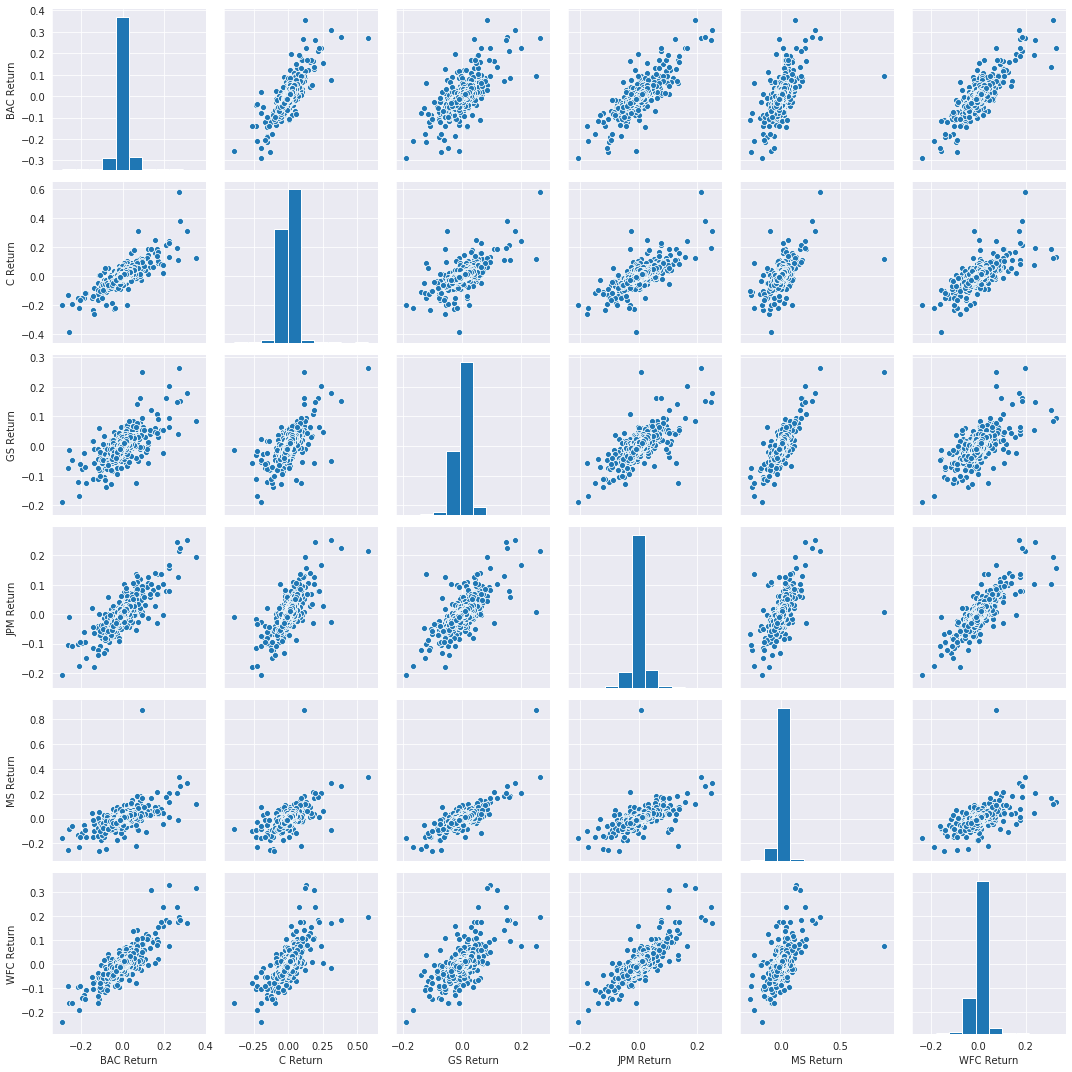

In [48]:
sns.pairplot(returns[1:])
plt.tight_layout()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [49]:
# Worst day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [50]:
# Best day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [51]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [52]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000258,-0.000157,0.000452,0.000575,0.000423,0.000657
std,0.036647,0.038672,0.025390,0.027667,0.037819,0.030238
min,-0.289694,-0.390244,-0.189596,-0.207274,-0.258929,-0.238223
25%,-0.011367,-0.011182,-0.010185,-0.009946,-0.012397,-0.008696
50%,0.000000,-0.000210,0.000368,0.000164,0.000254,0.000000
75%,0.010751,0.010751,0.011004,0.010022,0.012504,0.008844
max,0.352691,0.578249,0.264678,0.250967,0.869835,0.327645


In [53]:
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [54]:
returns['2015-01-01':'2015-12-31'].describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.000112,-0.000060,-0.000190,0.000311,-0.000656,0.000046
std,0.016163,0.015289,0.014046,0.014017,0.016249,0.012591
min,-0.052369,-0.060821,-0.045794,-0.052673,-0.057001,-0.050398
25%,-0.010198,-0.009133,-0.007799,-0.007311,-0.009831,-0.006585
50%,-0.000586,0.000352,0.000255,0.000084,-0.000386,-0.000179
75%,0.010144,0.008277,0.008539,0.008827,0.009926,0.007704
max,0.053659,0.048115,0.037236,0.050075,0.061230,0.045582


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

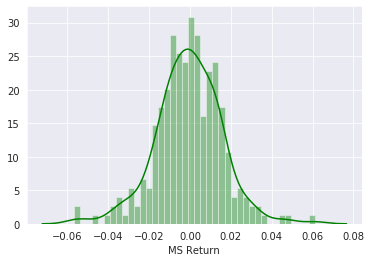

In [55]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=40)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

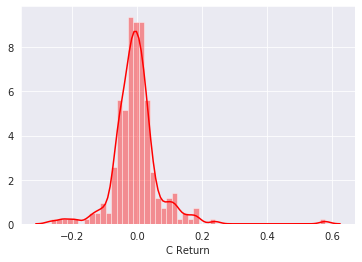

In [56]:
# Citigroup crash at this year
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

In [58]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

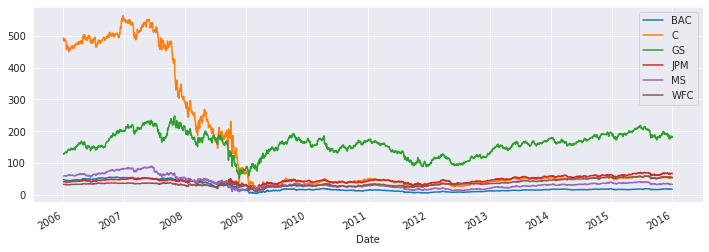

In [61]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))

plt.legend()

In [63]:
bank_closingPrice = bank_stocks.xs(key='Close',axis=1,level='Stock Info')
bank_closingPrice

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


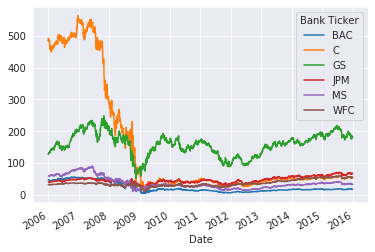

In [64]:
bank_closingPrice.plot()

In [66]:
# With Plotly
bank_closingPrice.iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [67]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789


In [68]:
BAC['Close']

Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2015-12-24    17.270000
2015-12-28    17.129999
2015-12-29    17.280001
2015-12-30    17.049999
2015-12-31    16.830000
Name: Close, Length: 2517, dtype: float64

In [75]:
BAC['Close']['2008-01-01':'2008-12-31']

Date
2008-01-02    40.560001
2008-01-03    40.299999
2008-01-04    39.849998
2008-01-07    39.900002
2008-01-08    38.410000
                ...    
2008-12-24    13.530000
2008-12-26    13.360000
2008-12-29    12.940000
2008-12-30    13.240000
2008-12-31    14.080000
Name: Close, Length: 253, dtype: float64

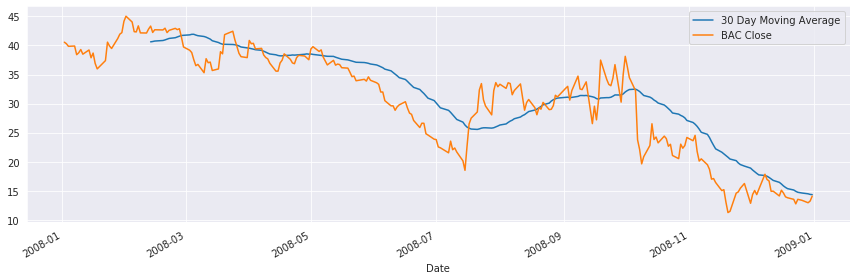

In [78]:
plt.figure(figsize=(12,4))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.tight_layout()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

In [84]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


In [115]:
# Get the correlation transform to matrix form
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


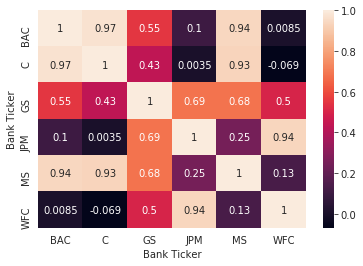

In [112]:
# Heat map
sns.heatmap(data=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

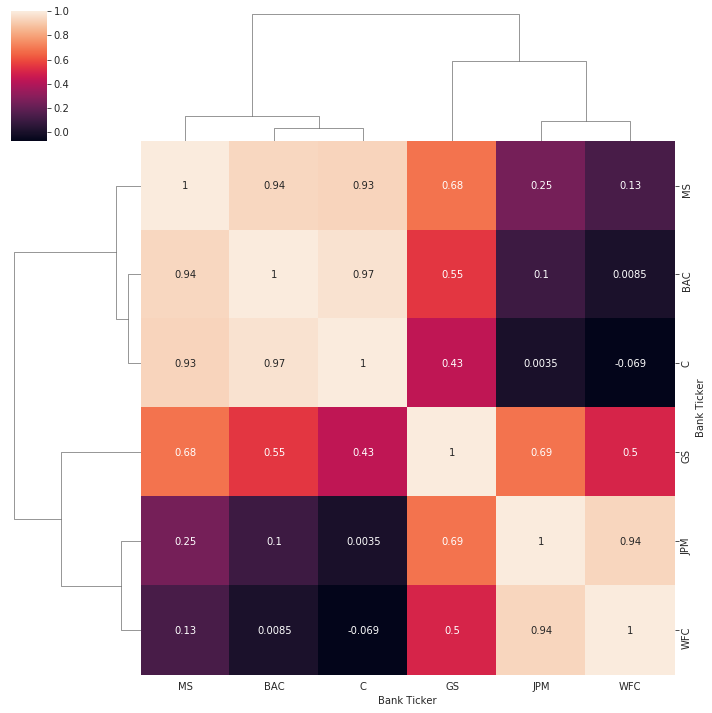

In [113]:
# Cluster map
sns.clustermap(data=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [122]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


In [123]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [125]:
BAC[['Open','High','Low','Close']]


,Open,High,Low,Close
Date,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002
2006-01-04,47.000000,47.240002,46.450001,46.580002
2006-01-05,46.580002,46.830002,46.320000,46.639999
2006-01-06,46.799999,46.910000,46.349998,46.570000
2006-01-09,46.720001,46.970001,46.360001,46.599998
...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000
2015-12-28,17.219999,17.230000,16.980000,17.129999
2015-12-29,17.250000,17.350000,17.160000,17.280001


In [127]:
BAC[['Open','High','Low','Close']]['2015-01-01':'2016-01-01']

,Open,High,Low,Close
Date,,,,
2015-01-02,17.990000,18.030001,17.680000,17.900000
2015-01-05,17.790001,17.809999,17.290001,17.379999
2015-01-06,17.420000,17.440001,16.780001,16.860001
2015-01-07,17.139999,17.180000,16.870001,16.940001
2015-01-08,17.160000,17.340000,17.100000,17.290001
...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000
2015-12-28,17.219999,17.230000,16.980000,17.129999
2015-12-29,17.250000,17.350000,17.160000,17.280001


In [128]:
bac15 = BAC[['Open','High','Low','Close']]['2015-01-01':'2016-01-01']

In [132]:
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [133]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [135]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.